# ***PREDICT THE QUALITY OF WINE***

---



# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "winequality-red.csv" with length 100951 bytes


In [ ]:
uploaded

{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\

# LOAD DATA

In [ ]:
import io
data = pd.read_csv(io.StringIO(uploaded['winequality-red.csv'].decode('utf-8')))
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#checking nulls
data.isnull().values.any()

False

In [ ]:
#checking for duplicate rows as many wines are common

duplicate_rows_df = data[data.duplicated()]
print(" number of duplicate rows: ", duplicate_rows_df.shape )

 number of duplicate rows:  (240, 12)


In [ ]:
#droping duplicates

data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


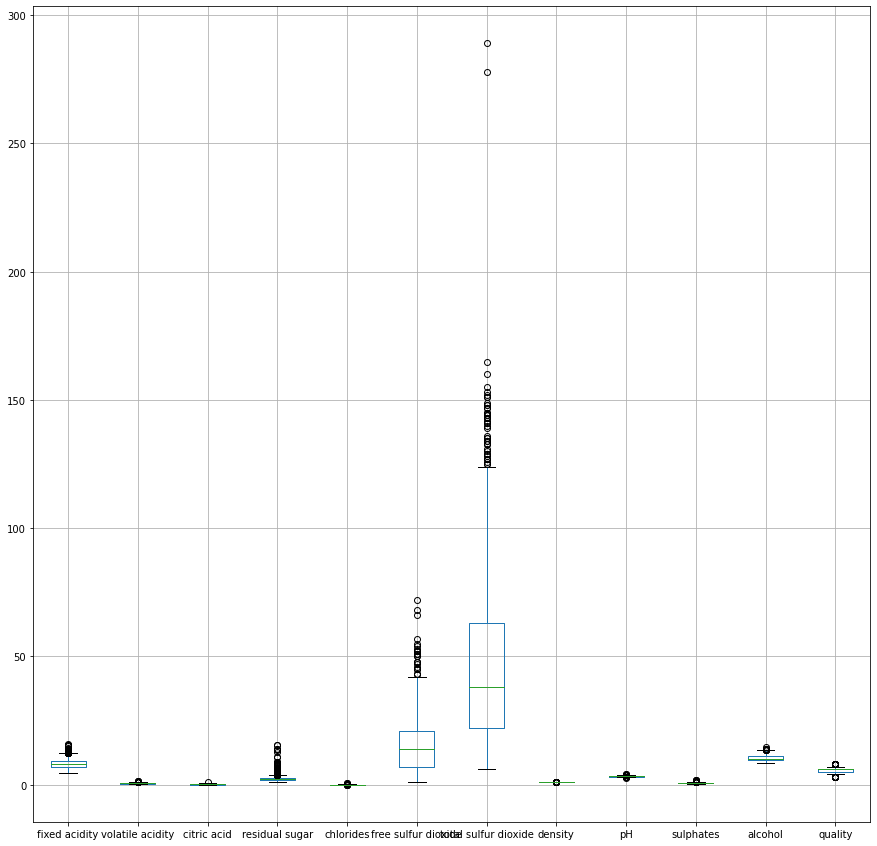

In [ ]:
cols = data.columns.tolist()

#Checking for Detecting Outliers
plt.subplots(figsize=(15,15))
boxplot = data.boxplot(column=cols)

In [ ]:
#Interquantile range calculation

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.10000
volatile acidity         0.25000
citric acid              0.34000
residual sugar           0.70000
chlorides                0.02100
free sulfur dioxide     14.00000
total sulfur dioxide    41.00000
density                  0.00222
pH                       0.19000
sulphates                0.18000
alcohol                  1.60000
quality                  1.00000
dtype: float64


In [ ]:
#removing Outliers 

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(1005, 12)

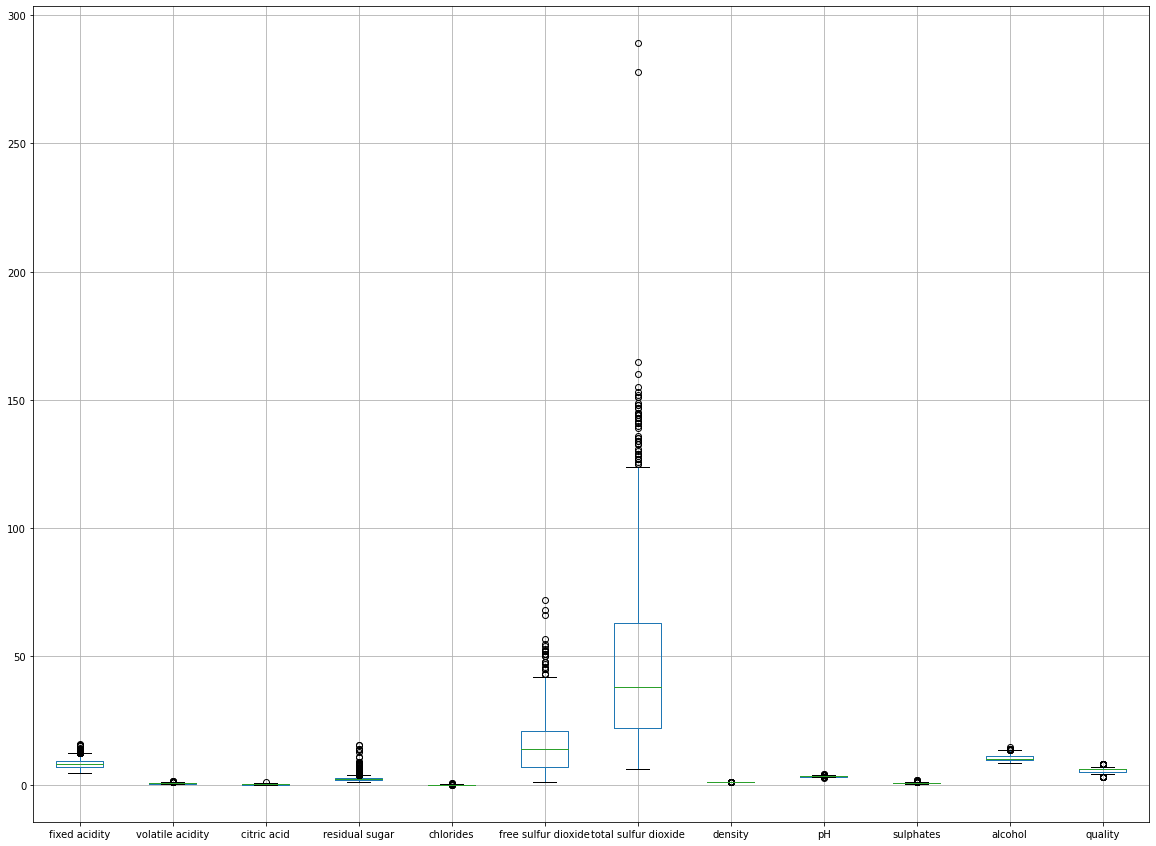

In [ ]:
# after removing outliers

plt.subplots(figsize=(20,15))
boxplot = data.boxplot(column=cols)

In [ ]:
#normalising data

d = preprocessing.normalize(data, axis = 0)
scaled_df = pd.DataFrame(d, columns=cols)
scaled_df['quality'] = data['quality'].values
scaled_df.head(21)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.023644,0.033896,0.000000,0.018004,0.020411,0.015690,0.016036,0.027156,0.028736,0.022325,0.024312,5
1,0.024922,0.042612,0.000000,0.024637,0.026319,0.035660,0.031600,0.027129,0.026198,0.027109,0.025346,5
2,0.024922,0.036801,0.003237,0.021794,0.024708,0.021396,0.025468,0.027134,0.026689,0.025913,0.025346,5
3,0.035785,0.013558,0.045316,0.018004,0.020142,0.024249,0.028298,0.027161,0.025870,0.023122,0.025346,6
4,0.023644,0.031959,0.000000,0.017056,0.020142,0.018543,0.018865,0.027156,0.028736,0.022325,0.024312,5
5,0.025241,0.029054,0.004855,0.015161,0.018531,0.021396,0.027827,0.027118,0.027016,0.018338,0.024312,5
6,0.023324,0.031475,0.000000,0.011371,0.017457,0.021396,0.009904,0.027069,0.027753,0.018737,0.025864,7
7,0.024922,0.028085,0.001618,0.018952,0.019605,0.012838,0.008489,0.027129,0.027508,0.022724,0.024570,7
8,0.023963,0.024211,0.029132,0.057803,0.019068,0.024249,0.048107,0.027156,0.027426,0.031893,0.027157,5
9,0.021407,0.028085,0.006474,0.017056,0.026051,0.021396,0.030656,0.027104,0.026853,0.021528,0.023794,5


In [ ]:
data = scaled_df

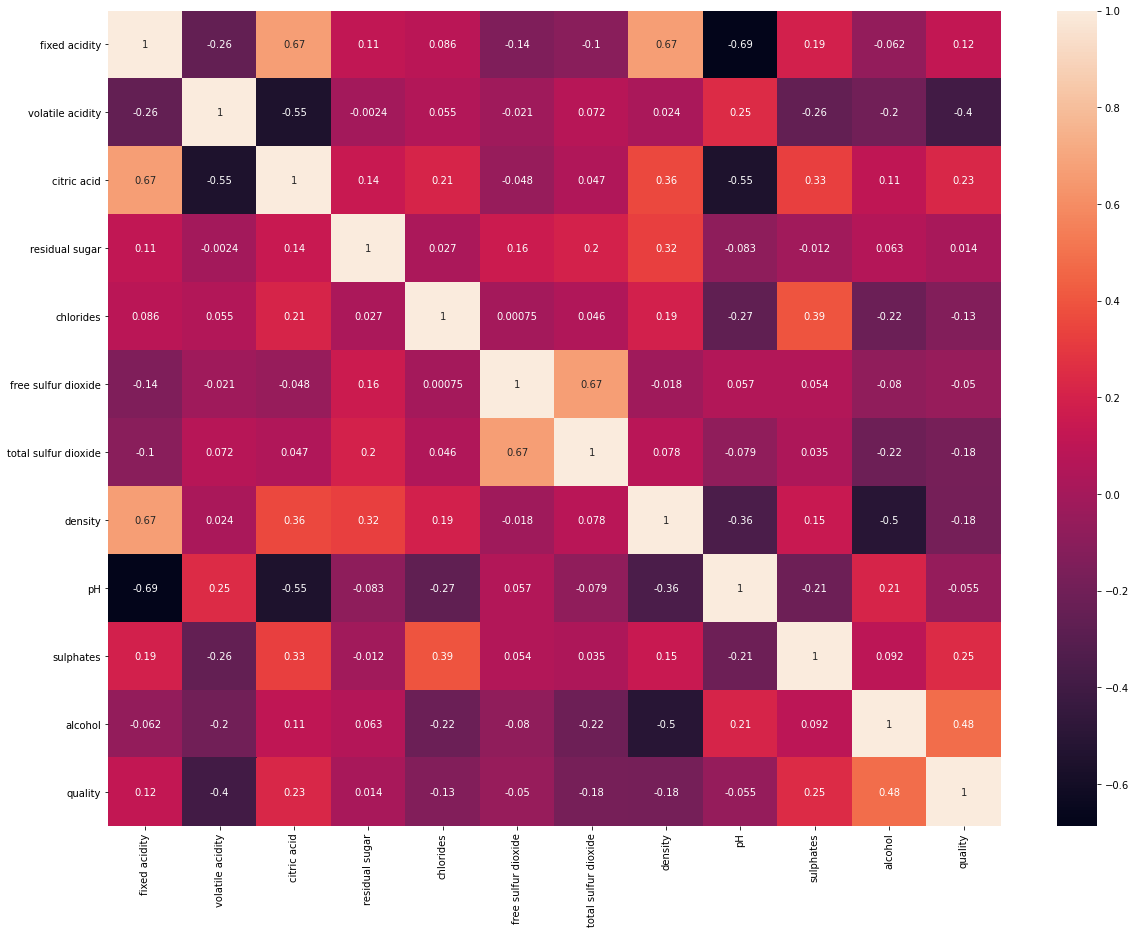

In [ ]:
plt.subplots(figsize=(20,15))
sn.heatmap(data.corr(), annot=True )

In [ ]:
#As we can see Volatile acidity, alchol, citric acid etc seem to play a lot of role in determining quality

#using knn algo

dataset_knn = data.copy()

NameError: ignored

In [ ]:
 wine_cat=[]
for i in dataset_knn["quality"]:
    if i >=7:
        wine_cat.append(1)
    else:
        wine_cat.append(0)
dataset_knn["wine_cat"]=wine_cat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
df_Predictors=dataset_knn.drop(["quality","wine_cat"],axis=1)
df_target=dataset_knn.wine_cat

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(df_Predictors,df_target,random_state=90,test_size=0.009)

print("Shape of Xtrain:{} and Shape of ytrain:{} ".format(Xtrain.shape,ytrain.shape))
print("Shape of Xtest:{} and Shape of ytest:{} ".format(Xtest.shape,ytest.shape))

Shape of Xtrain:(1346, 11) and Shape of ytrain:(1346,) 
Shape of Xtest:(13, 11) and Shape of ytest:(13,) 


In [ ]:

KNN=KNeighborsClassifier(n_neighbors=4)
KNN=KNN.fit(Xtrain,ytrain)
Knn_predict=KNN.predict(Xtest)

In [ ]:
metrics.accuracy_score(ytest,Knn_predict)

0.9230769230769231

### HYPERTUNING

In [ ]:
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10,11],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(Xtrain,ytrain)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
# hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
knn_hy=model1.predict(Xtest)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
metrics.accuracy_score(ytest,knn_hy)

0.9230769230769231